In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import time
import warnings
warnings.filterwarnings("ignore")

# **Data Loading**

In [2]:
df = pd. read_csv("/content/Medical Insurance Cost.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile = ProfileReport( df , title="Medical Insurance Cost.csv", explorative = True  )

profile.to_file("ydata.html")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 71.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Data Preprocessing**

In [4]:
print('Shape: ', df.shape)
print('\nDuplicate: ',df.duplicated().sum())

Shape:  (1338, 7)

Duplicate:  1


In [5]:
df = df.drop_duplicates()

In [6]:
print('Shape: ', df.shape)
print('\nColumns Name: ', df.columns)
print('\nTarget Variable: charges')

Shape:  (1337, 7)

Columns Name:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Target Variable: charges


In [7]:
display(df.info())
display(df.describe())
display(df.isnull().sum())
display(df.nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


None

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [8]:
target_col = 'charges'

numerical_cols = ['age', 'bmi', 'children']

categorical_cols = ['sex', 'smoker', 'region']

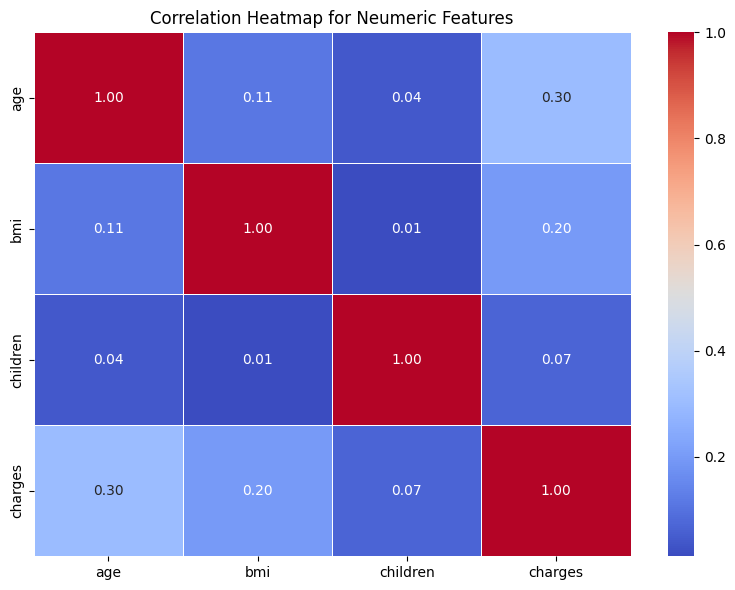

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64


In [9]:
corr_matrix = df[numerical_cols + [target_col]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Neumeric Features")
plt.tight_layout()
plt.show()

print(corr_matrix[target_col].sort_values(ascending=False))

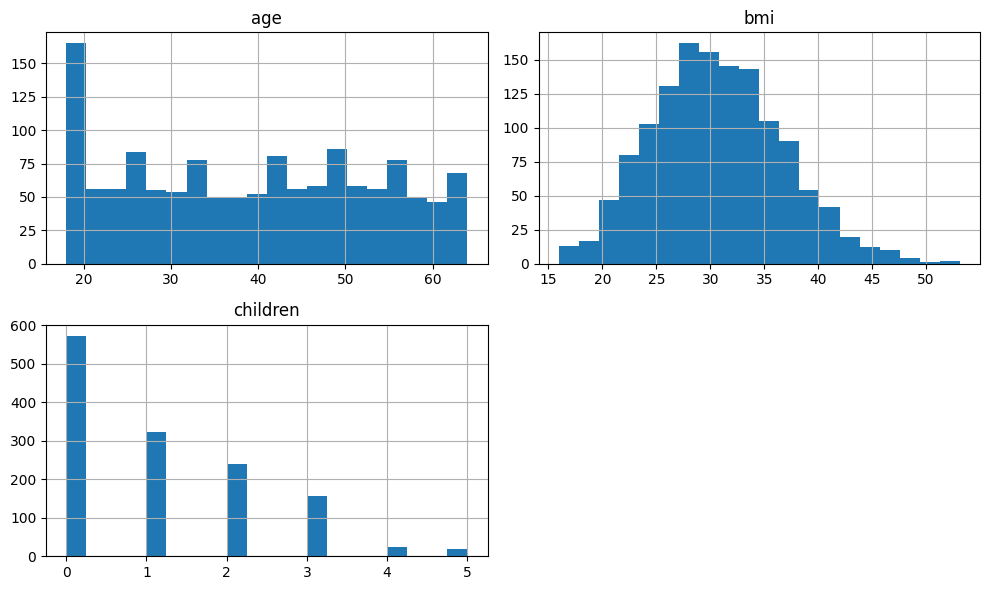

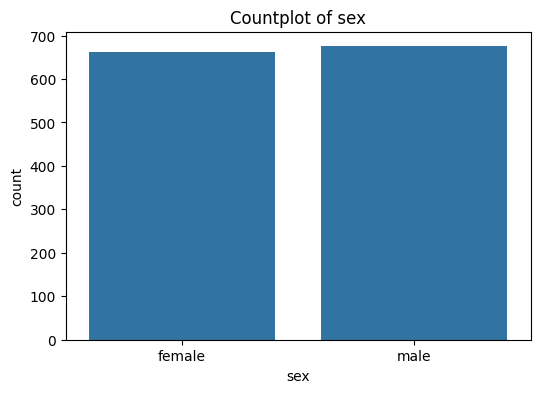

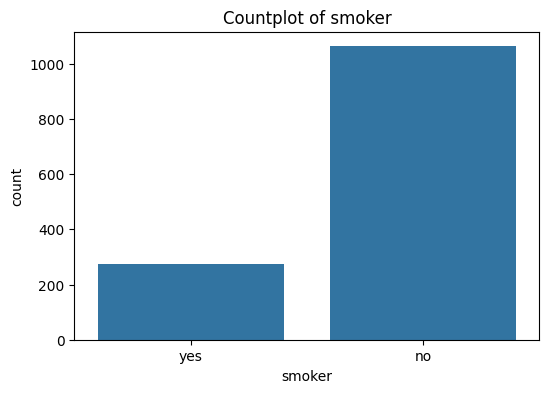

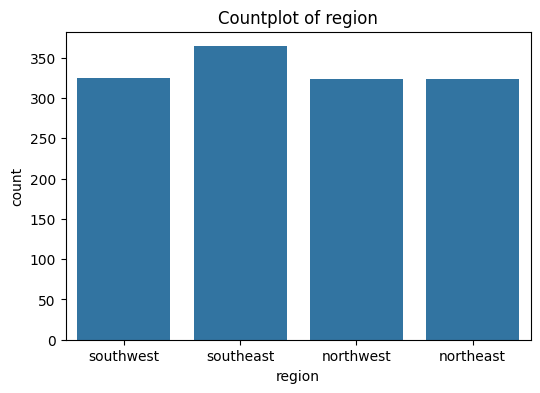

In [10]:
df[numerical_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

for c in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=c)
    plt.title(f"Countplot of {c}")
    plt.show()

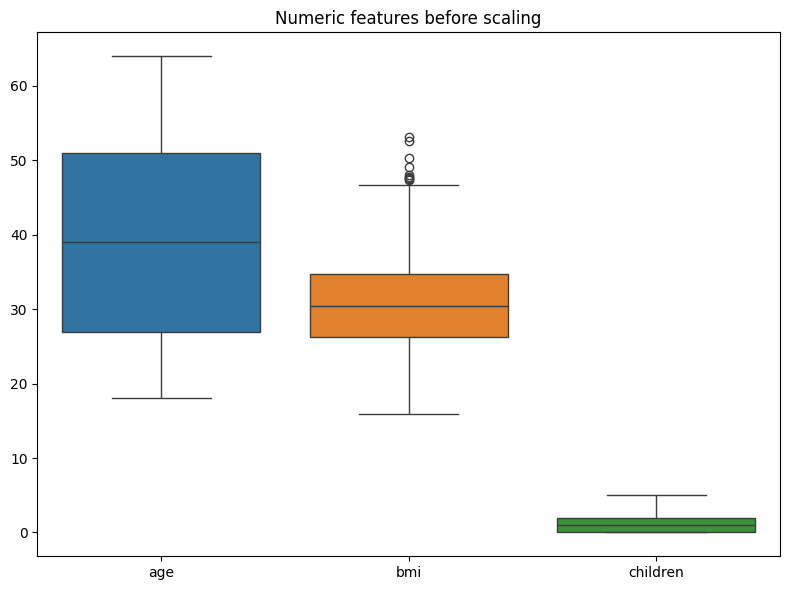

In [11]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Numeric features before scaling")
plt.tight_layout()
plt.show()

In [12]:
# Outliers in BMI

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound", lower_bound)
print("Upper bound", upper_bound)

outliers = ((df['bmi'] < lower_bound) | (df['bmi'] > upper_bound))
outliers_df = df[outliers]

print(f"\nNumber of outliers detected: {len(outliers_df)}")
display(outliers_df)

Lower bound 13.674999999999994
Upper bound 47.31500000000001

Number of outliers detected: 9


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [13]:
# Log-transform
df['bmi_log'] = np.log(df['bmi'] + 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_log
0,19,female,27.900,0,yes,southwest,16884.92400,3.363842
1,18,male,33.770,1,no,southeast,1725.55230,3.548755
2,28,male,33.000,3,no,southeast,4449.46200,3.526361
3,33,male,22.705,0,no,northwest,21984.47061,3.165686
4,32,male,28.880,0,no,northwest,3866.85520,3.397189


In [14]:
# Feature Engineering:

#BMI per Age
df['bmi_per_age'] = df['bmi'] / df['age']


# Binning Age
df['age_group'] = pd.cut(
    df['age'],
    bins = [18, 25, 45, 65],
    labels = ['Young', 'Adult', 'Senior'], right=False
)

df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_log,bmi_per_age,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,3.363842,1.468421,Young
1,18,male,33.770,1,no,southeast,1725.55230,3.548755,1.876111,Young
2,28,male,33.000,3,no,southeast,4449.46200,3.526361,1.178571,Adult
3,33,male,22.705,0,no,northwest,21984.47061,3.165686,0.688030,Adult
4,32,male,28.880,0,no,northwest,3866.85520,3.397189,0.902500,Adult


# **Pipeline Creation**

In [15]:
# Target and features
X = df.drop('charges', axis= 1)
y = df['charges']

In [16]:
# Column split
numerical_cols = ['age', 'children', 'bmi_per_age', 'bmi_log']
categorical_cols_for_label_encoding = ['sex', 'smoker']
categorical_cols_for_one_hot_encoding = ['region', 'age_group']

#Preprocessing
num_transformer = Pipeline (
    steps = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
] )

cat_label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_encoder', FunctionTransformer(lambda X: np.array([LabelEncoder().fit_transform(col) for col in X.T]).T))
])

cat_one_hot_transformer = Pipeline( steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
] )

preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer,numerical_cols),
        ('cat_label',cat_label_transformer,categorical_cols_for_label_encoding),
        ('cat_one_hot',cat_one_hot_transformer,categorical_cols_for_one_hot_encoding)
] )

# **Model Selections**
As this is a supervised regression problem, I choose some regression models.

In [17]:
# Models

mlr = LinearRegression()
plr = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])
svr = SVR(kernel='rbf', C= 1000000, epsilon= 0.1, gamma= 'scale')
knn = KNeighborsRegressor(n_neighbors= 10, metric= 'minkowski', p= 1, weights= 'uniform')
dt = DecisionTreeRegressor(max_depth= 7, random_state=42)
rf = RandomForestRegressor(n_estimators= 250, max_depth= 7, random_state=42)
ab = AdaBoostRegressor(estimator= DecisionTreeRegressor(max_depth= 7, random_state=42), n_estimators= 250, learning_rate= 0.1, random_state=42)
gb = GradientBoostingRegressor(n_estimators=250, max_depth=3, learning_rate= 0.1,  random_state=42)
xgb = XGBRegressor(n_estimators=250, max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, objective="reg:squarederror", eval_metric="rmse", random_state=42)

# Voting Regressor
voting_reg = VotingRegressor(estimators=[('rf', rf), ('ab', ab), ('gb', gb), ('xgb', xgb)])

# Stacking Regressor
stacking_reg = StackingRegressor(estimators=[('rf', rf), ('ab', ab),  ('gb', gb), ('xgb', xgb)], final_estimator=Ridge())

In [18]:
# Dictionary of all models
model_to_train = {
    'Linear Regression': mlr,
    'Polynomial Regression': plr,
    'SVR': svr,
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ab,
    'Gradient Boosting': gb,
    'XGBoost': xgb,
    'Voting Ensemble': voting_reg,
    'Stacking Ensemble': stacking_reg
}

In [19]:
# Train-test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

# **Model Training**

In [20]:
# Training & Evaluation

result = []

for name, model in model_to_train.items():
    start_time = time.time()

    pipe = Pipeline(
        [
            ('preprocessor', preprocessor),
            ('model', model)
        ]
    )

    # Training
    pipe.fit(X_train, y_train)

    # Measure elapsed time
    elapsed_time = time.time() - start_time

    # Predict
    y_train_pred = pipe.predict(X_train)
    y_pred = pipe.predict(X_test)

    # Train Evaluation
    r2_train = r2_score(y_train, y_train_pred)

    # Test Evaluation
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    result.append({
        "Model": name,
        "R2 Score Train": r2_train,
        "R2 Score": r2,
        "R2 Difference": r2_train - r2,
        "RMSE": rmse,
        "MAE": mae,
        "Time to Train (seconds)": elapsed_time
    })

results_df = pd.DataFrame(result).sort_values("R2 Score", ascending=False)
results_df

,Model,R2 Score Train,R2 Score,R2 Difference,RMSE,MAE,Time to Train (seconds)
10,Stacking Ensemble,0.927735,0.895789,0.031945,4375.998632,2461.022079,16.319340
5,Random Forest,0.925969,0.895370,0.030599,4384.794005,2453.857474,1.232948
9,Voting Ensemble,0.938567,0.895131,0.043436,4389.796609,2836.913214,2.796305
7,Gradient Boosting,0.949935,0.893196,0.056739,4430.114534,2571.993836,0.612915
8,XGBoost,0.926987,0.892030,0.034957,4454.218787,2631.348232,0.139257
6,AdaBoost,0.895742,0.855815,0.039927,5147.322699,3923.212366,1.718110
4,Decision Tree,0.918914,0.842177,0.076737,5385.247680,2843.602191,0.021333
1,Polynomial Regression,0.877824,0.836114,0.041710,5487.710797,3527.840511,0.188461
2,SVR,0.884292,0.832937,0.051355,5540.652296,2816.455437,108.225678
0,Linear Regression,0.736147,0.798585,-0.062438,6083.678221,4358.343191,0.081940


Now, I choose XGBoost Regressor as Primary model for further analysis by CV, Hyperparameter tuning, beacuse this provide the most balance performance between training and tesing score and requires less computational time than other, especially Random Forest and Gradient Boosting.

# **Cross Validation**

In [21]:
xgb_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(
            n_estimators=250,
            max_depth=3,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="reg:squarederror",
            eval_metric="rmse",
            random_state=42
        ))
    ]
)


xgb_cv_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgb_cv_rmse = np.sqrt(-xgb_cv_scores)

print("XGBoost CV RMSE: ", xgb_cv_rmse)
print("Mean CV RMSE (XGBoost): ", xgb_cv_rmse.mean())
print("Standard Deviation CV RMSE (XGBoost): ", xgb_cv_rmse.std())

XGBoost CV RMSE:  [5526.14201021 4614.05586396 4730.46584114 4552.80881634 4865.58802445]
Mean CV RMSE (XGBoost):  4857.812111218645
Standard Deviation CV RMSE (XGBoost):  350.8237475367855


# **Hyperparameter Tuning**

In [22]:
# RandomizedSearchCV

xgb_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(random_state=42))
    ]
)

param_dist = {
    'model__n_estimators': [100, 200, 250, 300, 350, 400],
    'model__max_depth': [3, 5, 7, 10, 15],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'model__subsample': [0.7, 0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)


random_search_xgb.fit(X_train, y_train)

print("Best Parameters: ", random_search_xgb.best_params_)
print("Best Score: ", -random_search_xgb.best_score_)


# Best model from RandomizedSearchCV
best_xgb_model = random_search_xgb.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nRandomizedSearchCV Best Scores: ")
print("Best R2 Score: ", r2)
print("Best RMSE: ", rmse)
print("Best MAE: ", mae)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters:  {'model__subsample': 0.9, 'model__n_estimators': 300, 'model__max_depth': 3, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.7}
Best Score:  4699.697996821289

RandomizedSearchCV Best Scores: 
Best R2 Score:  0.899051101566147
Best RMSE:  4306.967871425271
Best MAE:  2569.1966659687505


In [23]:
#Grid Search CV

xgb_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(random_state=42))
    ]
)


param_grid = {
    'model__n_estimators': [100, 200, 250, 300],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'model__subsample': [0.7, 0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.8, 0.9]
}


grid_search_xgb = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)


grid_search_xgb.fit(X_train, y_train)

print("Best Parameters: ", grid_search_xgb.best_params_)
print("Best Score: ", -grid_search_xgb.best_score_)

# Best model from GridSearchCV
best_xgb_model = grid_search_xgb.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nGridSearchCV Best Scores: ")
print("Best R2 Score: ", r2)
print("Best RMSE: ", rmse)
print("Best MAE: ", mae)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters:  {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}
Best Score:  4607.306408567551

GridSearchCV Best Scores: 
Best R2 Score:  0.9025532132488574
Best RMSE:  4231.599932276479
Best MAE:  2509.67180034375


# **Best Model Selection with Evaluation**

Best model XGBBoost Regressor's
Best Parameters:  {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}

In [35]:
# Best Model

best_model_xgb = XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
    n_jobs=-1
)

best_model_xgb_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', best_model_xgb)
    ])

best_model_xgb_pipeline.fit(X_train, y_train)

y_pred = best_model_xgb_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Best Model Scores: ")
print("R2 Score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

# Save Best Model
!pip install cloudpickle
import cloudpickle

with open('best_model_xgb.pkl', 'wb') as f:
    cloudpickle.dump(best_model_xgb_pipeline, f)

print("✅ Best model saved as best_model_xgb.pkl")

Best Model Scores: 
R2 Score:  0.9025532132488574
RMSE:  4231.599932276479
MAE:  2509.67180034375
✅ Best model saved as best_model_xgb.pkl


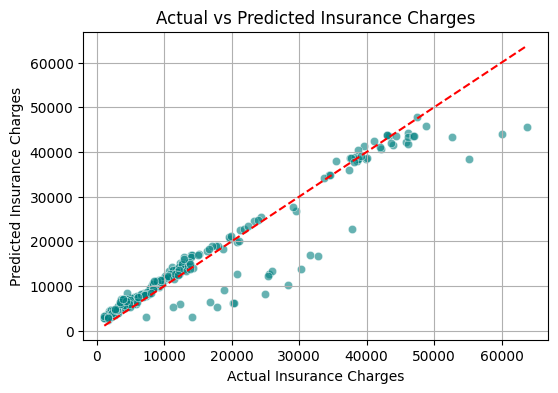

In [36]:
# Actual vs Predicted plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.grid(True)
plt.show()

# **Preapare the Best Model for Web Interface**

Duplicate:  1
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.7

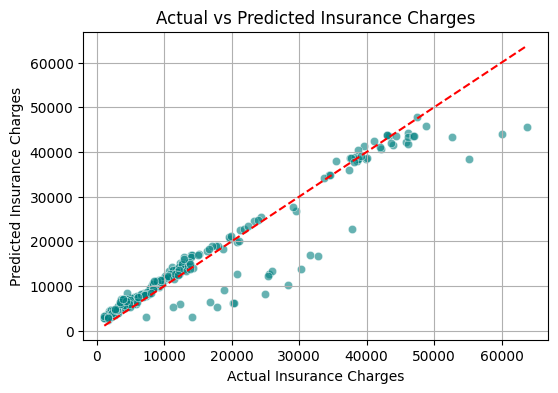

In [37]:
import pandas as pd
import numpy as np
import cloudpickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# Load dataset
# =====================
df = pd.read_csv("/content/Medical Insurance Cost.csv")
df.head()

# Drop duplicates
print('Duplicate: ',df.duplicated().sum())
df = df.drop_duplicates()

# Display Info
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.nunique())

# =====================
# Outlier
# =====================

# Outliers in BMI
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound", lower_bound)
print("Upper bound", upper_bound)

outliers = ((df['bmi'] < lower_bound) | (df['bmi'] > upper_bound))
outliers_df = df[outliers]

print(f"\nNumber of outliers detected: {len(outliers_df)}")
print(outliers_df)

# =====================
# Feature Engineering
# =====================
# Log-transform bmi
df['bmi_log'] = np.log(df['bmi'] + 1)

# BMI per Age
df['bmi_per_age'] = df['bmi'] / df['age']

# Binning Age
df['age_group'] = pd.cut(
    df['age'],
    bins=[18, 25, 45, 65],
    labels=['Young', 'Adult', 'Senior'], right=False
)

# Target and features
X = df.drop('charges', axis=1)
y = df['charges']

# =====================
# Column split
# =====================
numerical_cols = ['age', 'children', 'bmi_per_age', 'bmi_log']
categorical_cols_for_label_encoding = ['sex', 'smoker']
categorical_cols_for_one_hot_encoding = ['region', 'age_group']

# =====================
# Preprocessing
# =====================
# Numerical features: impute missing values and scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features for label encoding
cat_label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_encoder', FunctionTransformer(lambda X: np.array([LabelEncoder().fit_transform(col) for col in X.T]).T))
])

# Categorical features for one-hot encoding
cat_one_hot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all transformers into a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_cols),
    ('cat_label', cat_label_transformer, categorical_cols_for_label_encoding),
    ('cat_one_hot', cat_one_hot_transformer, categorical_cols_for_one_hot_encoding)
])

# =====================
# Best Model: XGBoost
# =====================
best_model_xgb = XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
    n_jobs=-1
)

# Create full pipeline with preprocessing and model
best_model_xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model_xgb)
])

# =====================
# Train-test split
# =====================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =====================
# Train the model
# =====================
best_model_xgb_pipeline.fit(X_train, y_train)

# =====================
# Evaluation
# =====================
y_pred = best_model_xgb_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Best Model Scores: ")
print("R2 Score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

# =====================
# Save Best Model
# =====================
with open('best_model_xgb.pkl', 'wb') as f:
    cloudpickle.dump(best_model_xgb_pipeline, f)

print("✅ Best model saved as best_model_xgb.pkl")

# =====================
# Plot Actual vs Predicted
# =====================
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.grid(True)
plt.show()